In [48]:
class Graph:
    def __init__(self, startNode, graph, heuristicNodeValue):
         
        self.graph = graph
        self.H=heuristicNodeValue
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
        
    def aoStarAlgo(self):        
 # starts a recursive AO* algorithm
        self.aoStar(self.start, False)
 
    def getNeighbors(self, v):     
        return self.graph.get(v,'')
    
    def getStatus(self,v):
        return self.status.get(v,0)
    
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
    
    def setStatus(self,v, val):
        self.status[v]=val
 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value 
        
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")
    def computeMinimumCostChildNodes(self, v):     
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True

        for nodeInfoTupleList in self.getNeighbors(v):# iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)

            if flag==True:  
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList
                flag=False
            else:                                
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList  

        return minimumCost, costToChildNodeListDict[minimumCost] 
    def aoStar(self, v, backTracking):     
# AO* algorithm for a start node and backTracking status flag
        
        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("--------------------------------------------------------------------")
        
        if self.getStatus(v) >= 0:       
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            
            solved=True                   
# check the Minimum Cost nodes of v are solved   
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            
            if solved==True:            
                self.setStatus(v,-1)    
                self.solutionGraph[v]=childNodeList 
            
            if v!=self.start:             
                self.aoStar(self.parent[v], True)   
                
            if backTracking==False:    
                for childNode in childNodeList:  
                    self.setStatus(childNode,0)   
                    self.aoStar(childNode, False)

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}  # Heuristic values of Nodes 
graph2 = {                                        # Graph of Nodes and Edges 
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],      # Neighbors of Node 'A', B, C & D with repective weights 
    'B': [[('G', 1)], [('H', 1)]],                # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]                   # Each sublist indicate a "OR" node or "AND" nodes
}
G2 = Graph(graph2, h2, 'A')
G2.aoStarAlgo()                                  
G2.printSolution() 

HEURISTIC VALUES  : A
SOLUTION GRAPH    : {}
PROCESSING NODE   : {'A': [[('B', 1), ('C', 1)], [('D', 1)]], 'B': [[('G', 1)], [('H', 1)]], 'D': [[('E', 1), ('F', 1)]]}
--------------------------------------------------------------------


TypeError: unhashable type: 'dict'

# local weighted regression

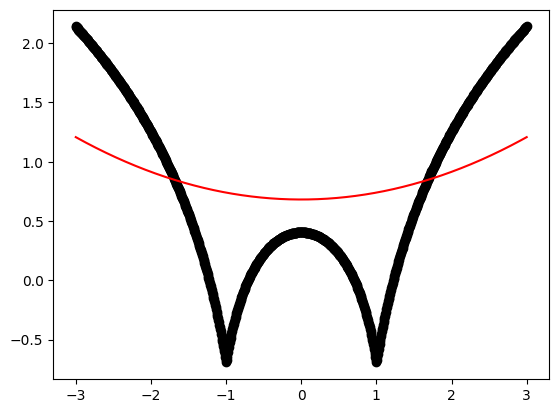

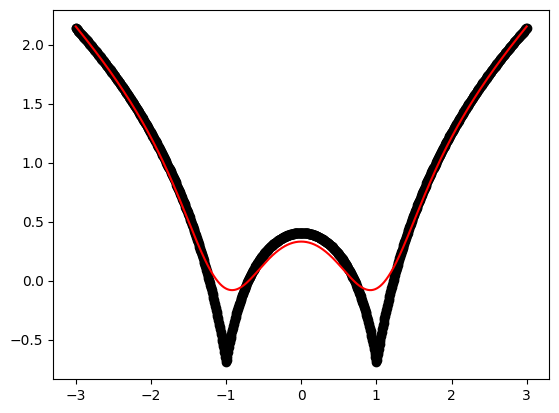

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(X0,X,Y,tau):
    X0 = [1,X0]
    X = [[1,i] for i in X]
    X = np.asarray(X)
    xw = (X.T)*np.exp(np.sum((X-X0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@X)@xw@Y@X0
    return beta
def draw(tau):
    prediction = [local_regression(X0,X,Y,tau) for X0 in domain]
    plt.plot(X,Y,'o',color='black')
    plt.plot(domain,prediction,color='red')
    plt.show()
X = np.linspace(-3,3,num=1000)
domain = X
Y = np.log(np.abs(X**2-1)+0.5)
draw(10)
draw(0.1)

# EM algorithm

Km Accuracy score:  0.868421052631579
Km Confusion matrix:
 [[17  0  0]
 [ 0 11  4]
 [ 0  1  5]]
gm Accuracy score:  0.9736842105263158
gm Confusion matrix:
 [[17  0  0]
 [ 0 11  0]
 [ 0  1  9]]


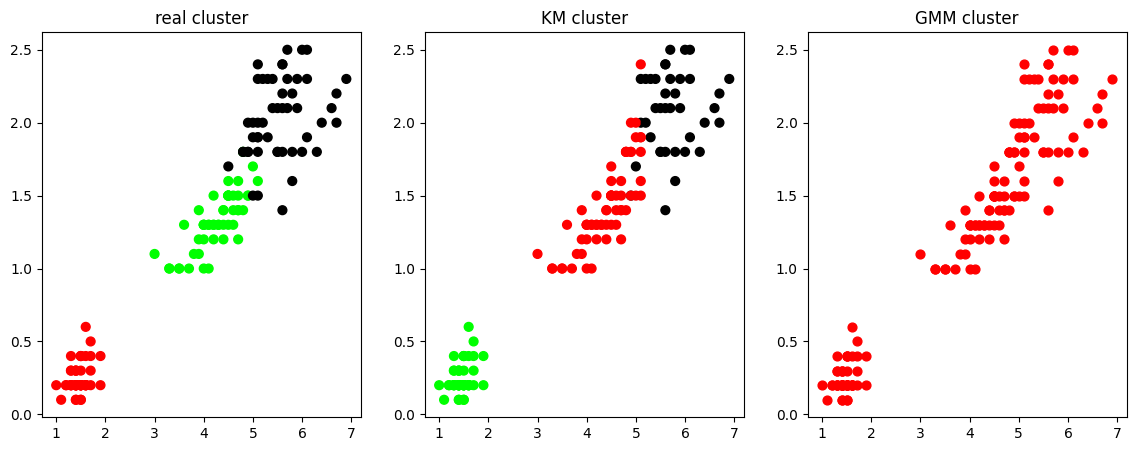

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
x = pd.DataFrame(iris["data"],columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris["target"],columns=["target"])

model = KMeans(n_clusters=3)
model.fit(x)
predicted = model1.predict(x_test)
print("Km Accuracy score: ",metrics.accuracy_score(predicted,y_test))
print("Km Confusion matrix:\n",metrics.confusion_matrix(predicted,y_test))

colormap = np.array(['red','lime','black'])
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[y.target],s=40)
plt.title("real cluster")


plt.subplot(1,3,2)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[model.labels_],s=40)
plt.title("KM cluster")


scaler = StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa,columns = x.columns)
gmm = GaussianMixture(n_components=40)
gmm.fit(xs)

model2 = GaussianMixture(n_components=3)
model2.fit(x_train,y_train)
predicted = model2.predict(x_test)
print("gm Accuracy score: ",metrics.accuracy_score(predicted,y_test))
print("gm Confusion matrix:\n",metrics.confusion_matrix(predicted,y_test))

plt.subplot(1,3,3)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[0],s=40)
plt.title("GMM cluster")
plt.show()


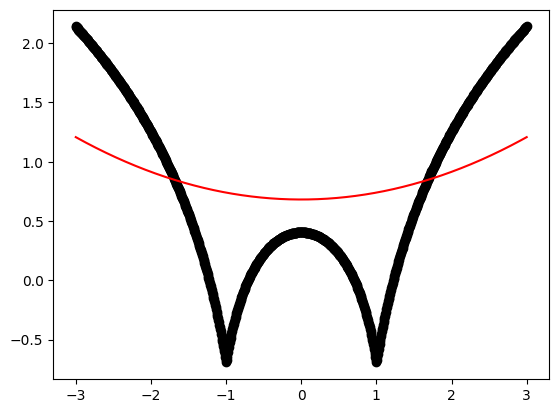

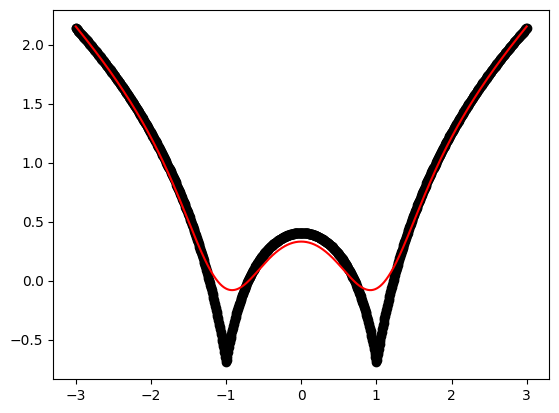

In [154]:
import matplotlib.pyplot as plt
import numpy as np

def local_regression(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    predicted = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain,predicted,color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2 -1)+0.5)
draw(10)
draw(0.1)

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

data = pd.read_csv(r"C:\Users\manit\Downloads\tennisdata.csv")
data.head(5)

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [156]:
x = data.iloc[:,:-1]
x.head(5)

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [157]:
y = data.iloc[:,-1]
y.head(5)

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

In [159]:
from sklearn.preprocessing import LabelEncoder
le_out = LabelEncoder()
x.Outlook = le_out.fit_transform(x.Outlook)

le_temp = LabelEncoder()
x.Temperature = le_temp.fit_transform(x.Temperature)

le_hum = LabelEncoder()
x.Humidity = le_hum.fit_transform(x.Humidity)

le_windy = LabelEncoder()
x.Windy = le_windy.fit_transform(x.Windy)

le_play = LabelEncoder()
y = le_play.fit_transform(y)

print(x.head(5))
print(y)

   Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1            0         1      1
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [161]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
model = GaussianNB()
model.fit(xtrain, ytrain)
predicted = model.predict(xtest)

In [163]:
print("Accuracy score:",accuracy_score(predicted,ytest))

Accuracy score: 0.6666666666666666
